In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

In [2]:
athlete = pd.read_csv("athlete_events.csv")
noc = pd.read_csv("noc_regions.csv")

In [3]:
athlete2 = athlete.copy()
noc2 = noc.copy()

In [4]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
noc.info

<bound method DataFrame.info of      NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]>

In [7]:
result = athlete.loc[athlete['Team']=='India']

In [8]:
result2 = result.loc[(result["Medal"]=="Gold") | (result["Medal"]=="Silver")]

In [9]:
result2.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold
8192,4518,"Joseph Anthony ""Joe"" Antic",M,29.0,168.0,59.0,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver
10274,5618,Sardar Mohammad Aslam,M,NaN,NaN,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold


## Data Exploration

In [10]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [12]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20760 entries, 0 to 20759
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      20760 non-null  int64  
 1   Name    20760 non-null  object 
 2   Sex     20760 non-null  object 
 3   Age     19909 non-null  float64
 4   Height  16223 non-null  float64
 5   Weight  16051 non-null  float64
 6   Team    20760 non-null  object 
 7   NOC     20760 non-null  object 
 8   Games   20760 non-null  object 
 9   Year    20760 non-null  int64  
 10  Season  20760 non-null  object 
 11  City    20760 non-null  object 
 12  Sport   20760 non-null  object 
 13  Event   20760 non-null  object 
 14  Medal   2743 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.4+ MB


In [13]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [14]:
athlete.describe()

,ID,Age,Height,Weight,Year
count,20760.000000,19909.000000,16223.000000,16051.000000,20760.000000
mean,5620.024037,25.478628,175.459533,70.884493,1979.468979
std,3152.405419,6.272767,10.267706,14.114344,29.046927
min,1.000000,12.000000,132.000000,32.000000,1896.000000
25%,2945.000000,21.000000,169.000000,61.000000,1964.000000
50%,5691.000000,24.000000,175.000000,70.000000,1988.000000
75%,8384.000000,28.000000,183.000000,79.000000,2004.000000
max,10951.000000,84.000000,221.000000,163.000000,2016.000000


In [15]:
result = athlete.loc[(athlete["Age"]>50) & (athlete["Medal"]=="Gold")]

In [16]:
result

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5078,2894,Derek Swithin Allhusen,M,54.0,180.0,71.0,Great Britain,GBR,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Gold
7961,4404,Johan August Anker,M,56.0,NaN,NaN,Norna,NOR,1928 Summer,1928,Summer,Amsterdam,Sailing,Sailing Mixed 6 metres,Gold
13394,7272,"Nikolaus ""Klaus"" Balkenhol",M,52.0,178.0,83.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Dressage, Team",Gold
13396,7272,"Nikolaus ""Klaus"" Balkenhol",M,56.0,178.0,83.0,Germany,GER,1996 Summer,1996,Summer,Atlanta,Equestrianism,"Equestrianism Mixed Dressage, Team",Gold


## Data Cleaning and Data Manipulation

### Task1-> Add a new column to data fram "athlete" according to same value of noc with another df "noc"

In [17]:
ath = athlete.merge(noc,how="left",on="NOC",)
# athlete.drop(['notes'],axis = 1, inplace=True)

In [18]:
athlete.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [19]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Task-> to place the region column with NOC

In [20]:
region_col = athlete['NOC'].map(noc2.set_index('NOC')['region'])
athlete.insert(7,'region',region_col);

In [21]:
athlete

,ID,Name,Sex,Age,Height,Weight,Team,region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20755,10950,Viesturs Brzi,M,26.0,177.0,85.0,Latvia,Latvia,LAT,2000 Summer,2000,Summer,Sydney,Cycling,Cycling Men's Sprint,NaN
20756,10950,Viesturs Brzi,M,26.0,177.0,85.0,Latvia,Latvia,LAT,2000 Summer,2000,Summer,Sydney,Cycling,Cycling Men's Team Sprint,NaN
20757,10951,Barnabs Berzsenyi,M,34.0,NaN,NaN,Hungary,Hungary,HUN,1952 Summer,1952,Summer,Helsinki,Fencing,"Fencing Men's epee, Individual",NaN
20758,10951,Barnabs Berzsenyi,M,34.0,NaN,NaN,Hungary,Hungary,HUN,1952 Summer,1952,Summer,Helsinki,Fencing,"Fencing Men's epee, Team",NaN


In [22]:
athlete.drop(['NOC'],axis=1,inplace=True)

In [23]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Handling the NULL Values in the columns -> 'Age','Height','Weight'

In [24]:
athlete.isnull().sum()

ID            0
Name          0
Sex           0
Age         851
Height     4537
Weight     4709
Team          0
region       15
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     18017
dtype: int64

In [25]:
mean = athlete['Age'].mean()
athlete['Age'].fillna(mean,inplace=True)

In [26]:
athlete.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height     4537
Weight     4709
Team          0
region       15
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     18017
dtype: int64

In [27]:
mean = athlete['Height'].mean()
athlete['Height'].fillna(mean,inplace=True)

In [28]:
mean = athlete['Weight'].mean()
athlete['Weight'].fillna(mean,inplace=True)

In [29]:
athlete.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
region       15
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     18017
dtype: int64

In [30]:
athlete.iloc[[147]]

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,25.478628,175.459533,70.884493,Iran,Iran,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN


### List out all the values of egion column where values are null

In [31]:
athlete[athlete['region'].isnull()].head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,175.459533,70.884493,Singapore,NaN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25.0,175.459533,70.884493,Singapore,NaN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.000000,68.000000,Singapore,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.000000,61.000000,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21.0,180.000000,75.000000,Singapore,NaN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [32]:
noc2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Handling the null values in the column->"Medals"

In [33]:
athlete['Medal'].nunique()

3

In [34]:
arr = athlete['Medal'].unique()
arr

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [35]:
athlete['Medal'].value_counts()

Silver    927
Gold      917
Bronze    899
Name: Medal, dtype: int64

### Replace
### Nan -> 0
### Gold ->1
### Silver -> 2
### Bronze -> 3

In [36]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.459533,70.884493,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.459533,70.884493,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [37]:
athlete['Medal'].replace(arr[0],0,inplace=True)
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.459533,70.884493,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.459533,70.884493,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [38]:
athlete['Medal'].replace(arr[1],1,inplace=True)
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.459533,70.884493,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.459533,70.884493,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [39]:
athlete['Medal'].replace(arr[2],2,inplace=True)
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.459533,70.884493,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.459533,70.884493,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [40]:
athlete['Medal'].replace(arr[3],3,inplace=True)
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.459533,70.884493,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.459533,70.884493,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [41]:
athlete[athlete['Medal']==3]

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
63,20,Kjetil Andr Aamodt,M,22.000000,176.000000,85.000000,Norway,Norway,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,3
67,20,Kjetil Andr Aamodt,M,22.000000,176.000000,85.000000,Norway,Norway,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,3
86,25,Alf Lied Aanning,M,24.000000,175.459533,70.884493,Norway,Norway,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",3
92,30,Pepijn Aardewijn,M,26.000000,189.000000,72.000000,Netherlands,Netherlands,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,3
106,38,Karl Jan Aas,M,20.000000,175.459533,70.884493,Norway,Norway,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20703,10920,J. Bertrand,M,25.478628,175.459533,70.884493,Tritons Lillois-2,France,1900 Summer,1900,Summer,Paris,Swimming,Swimming Men's 200 metres Team Swimming,3
20707,10923,John Joseph Bertrand,M,28.000000,185.000000,82.000000,United States,USA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed One Person Dinghy,3
20718,10930,Christina Bertrup,F,37.000000,175.000000,66.000000,Sweden,Sweden,2014 Winter,2014,Winter,Sochi,Curling,Curling Women's Curling,3
20751,10948,Juris Brzi,M,26.000000,154.000000,50.000000,Soviet Union,Russia,1980 Summer,1980,Summer,Moskva,Rowing,Rowing Men's Coxed Fours,3


In [42]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20760 entries, 0 to 20759
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      20760 non-null  int64  
 1   Name    20760 non-null  object 
 2   Sex     20760 non-null  object 
 3   Age     20760 non-null  float64
 4   Height  20760 non-null  float64
 5   Weight  20760 non-null  float64
 6   Team    20760 non-null  object 
 7   region  20745 non-null  object 
 8   Games   20760 non-null  object 
 9   Year    20760 non-null  int64  
 10  Season  20760 non-null  object 
 11  City    20760 non-null  object 
 12  Sport   20760 non-null  object 
 13  Event   20760 non-null  object 
 14  Medal   20760 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 2.4+ MB


In [43]:
athlete.isnull().sum()

ID         0
Name       0
Sex        0
Age        0
Height     0
Weight     0
Team       0
region    15
Games      0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
dtype: int64

#### 6. Remove unwanted and irrelevant columns

In [44]:
# Colums to be removed off->
# 1. region
# 2. Games

athlete.drop(['region','Games'], inplace=True,axis=1)

In [45]:
athlete.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.459533,70.884493,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.459533,70.884493,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,Netherlands,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0
9,5,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,Netherlands,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",0


### 7. Remove the unwanted phrases from the 'Event'

In [46]:
# as we can see Sport name in the starting of the Event, so we have to remove that kind of stuff
for i,j in zip(athlete.Sport,range(len(athlete.Event))):
    athlete.Event[j] = re.sub(f"{i}\s","",athlete.Event[j])

<ipython-input-46-770b4d470ac2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete.Event[j] = re.sub(f"{i}\s","",athlete.Event[j])


In [47]:
athlete.head(200000)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.459533,70.884493,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.459533,70.884493,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20755,10950,Viesturs Brzi,M,26.0,177.000000,85.000000,Latvia,2000,Summer,Sydney,Cycling,Men's Sprint,0
20756,10950,Viesturs Brzi,M,26.0,177.000000,85.000000,Latvia,2000,Summer,Sydney,Cycling,Men's Team Sprint,0
20757,10951,Barnabs Berzsenyi,M,34.0,175.459533,70.884493,Hungary,1952,Summer,Helsinki,Fencing,"Men's epee, Individual",0
20758,10951,Barnabs Berzsenyi,M,34.0,175.459533,70.884493,Hungary,1952,Summer,Helsinki,Fencing,"Men's epee, Team",0


## Changing the Age dtype to int

In [48]:
athlete.Age = athlete.Age.astype(int)

In [49]:
athlete.Age = athlete.Age.astype(int)

In [50]:
athlete.describe()

,ID,Age,Height,Weight,Year,Medal
count,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000
mean,5620.024037,25.459008,175.459533,70.884493,1979.468979,0.264740
std,3152.405419,6.143581,9.076584,12.410663,29.046927,0.741085
min,1.000000,12.000000,132.000000,32.000000,1896.000000,0.000000
25%,2945.000000,22.000000,170.000000,64.000000,1964.000000,0.000000
50%,5691.000000,25.000000,175.459533,70.884493,1988.000000,0.000000
75%,8384.000000,28.000000,180.000000,75.000000,2004.000000,0.000000
max,10951.000000,84.000000,221.000000,163.000000,2016.000000,3.000000


In [51]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.000000,80.000000,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23,170.000000,60.000000,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24,175.459533,70.884493,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0
3,4,Edgar Lindenau Aabye,M,34,175.459533,70.884493,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21,185.000000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0


### Exportation of dataFrame

In [52]:
athlete.to_csv("athleteData.csv")

## Data Analysis

#### 1.Show the relation between height and weight

Text(0, 0.5, 'Widtht')

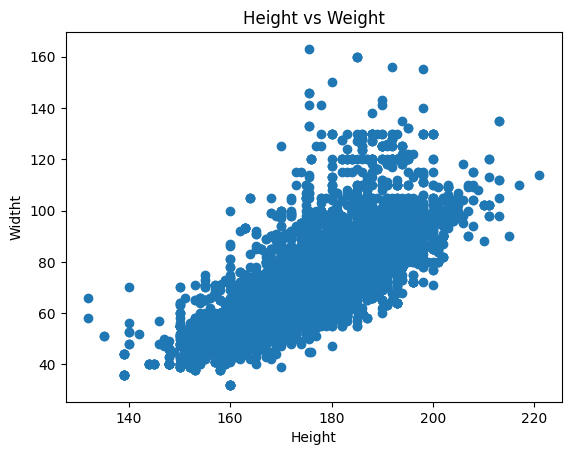

In [53]:
x = athlete.Height
y = athlete.Weight
plt.scatter(x,y)
plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Widtht")

* Conclusion: Height and Weight are directly proportional to each other

#### 2. Find out the total number of male and female had participated in Olympics during 1896 to 2016

In [54]:
countMale = 0
countFemale = 0
for i in athlete.Sex:
    if(i=='M'):
        countMale = countMale+1
    else:
        countFemale= countFemale+1

In [55]:
print("Total number of Males participated: ",countMale)
print("Total number of Females participated: ",countFemale)

Total number of Males participated:  15697
Total number of Females participated:  5063


Text(0, 0.5, 'Number')

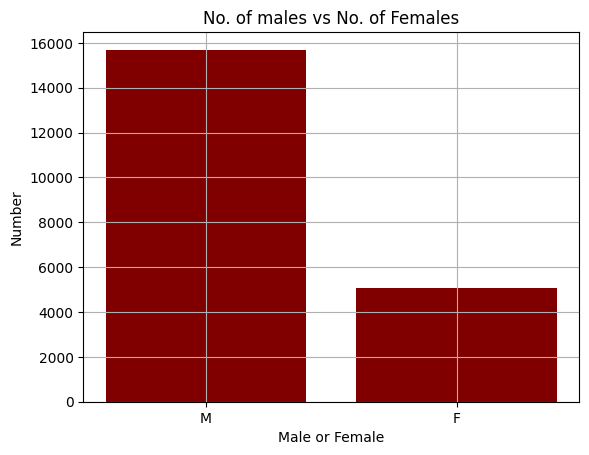

In [56]:
x = countMale
y = countFemale
l = ['M','F']
l2 = [x,y]
plt.bar(l,l2,color = "maroon")
plt.grid()
plt.title("No. of males vs No. of Females")
plt.xlabel("Male or Female")
plt.ylabel("Number")

#### 3. How many Male and Female have participated in summers and winter Olympics

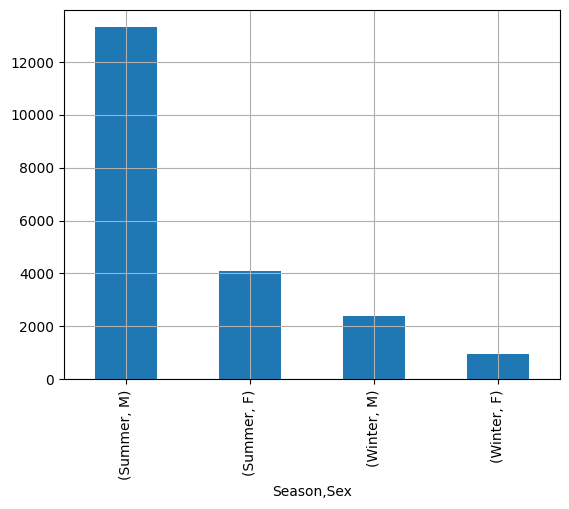

In [64]:
athlete['Sex'].groupby(athlete['Season']).value_counts().plot.bar(athlete['Sex'])
plt.grid()
plt.show()

In [76]:
fig = px.histogram(athlete,x = athlete.Season, color=athlete.Sex, barmode = "group")
fig.show()

#### 4.Name the top five countries who have most medals

In [86]:
total_medals = athlete.groupby(['Team', 'Medal']).size().reset_index(name='Medal Count')
top_countries = total_medals.groupby('Team')['Medal Count'].sum().nlargest(5).reset_index()

In [87]:
top_countries

,Team,Medal Count
0,United States,1175
1,France,1001
2,Sweden,868
3,Great Britain,849
4,Italy,825
